## Teste JPEG

In [2]:
import pydicom
import pickle
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from PIL import Image
import matplotlib.patches as patches
import sys
#param = sys.argv[1:]

imgarray = pickle.load(open('../data/imgarray.pkl', 'rb'))
imgarray_adequada = pickle.load(open('../data/imgarray_adequada.pkl', 'rb'))
param = pickle.load(open('../var/teste_jpeg.pkl', 'rb'))

In [3]:
%run ../dev/funcoes.ipynb

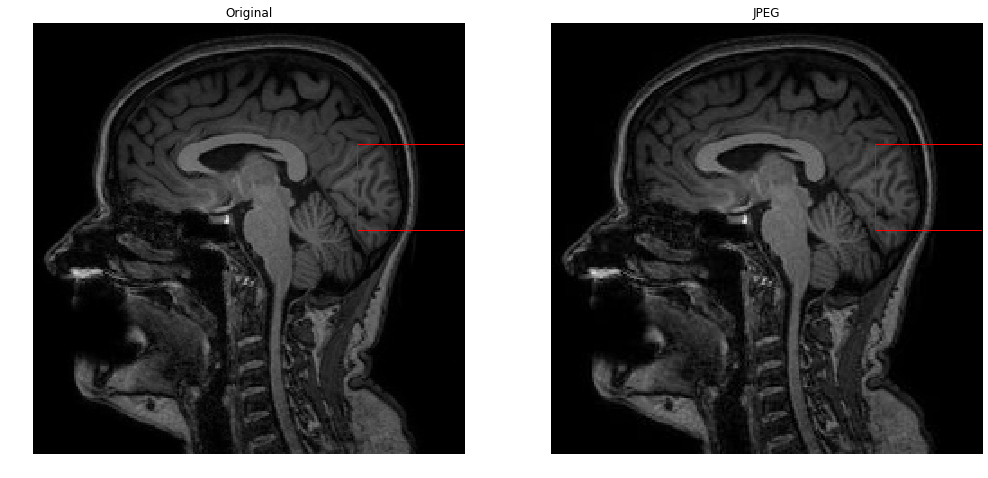

MSE : 3817.22
SSIM: 0.99


In [6]:
filename="../images/img.jpg"
filetype="jpeg"
qualidade=param[0]

porcent_x=param[1]
porcent_y=param[2]
porcent_w=param[3]
porcent_h=param[4]

if (porcent_w>100):
    porcent_w=100
if (porcent_w<0):
    porcent_w=0
if (porcent_h>100):
    porcent_h=100
if (porcent_h<0):
    porcent_h=0
if (porcent_x>99):
    porcent_x=99
if (porcent_x<1):
    porcent_x=1
if (porcent_y>99):
    porcent_y=99
if (porcent_y<1):
    porcent_y=1
if (porcent_x+porcent_w>100):
    porcent_w=(100-porcent_x)
if (porcent_y+porcent_h>100):
    porcent_h=(100-porcent_y)

Imagem_raw=Image.fromarray(imgarray)
Imagem_Adequada=Image.fromarray(imgarray_adequada)
Imagem_Adequada.save(filename, filetype, quality=qualidade)
Imagem_jpeg = Image.open(filename)
array_jpeg = np.array(Imagem_jpeg)

w=len(imgarray)
h=len(imgarray[0])

fig=plt.figure(figsize=(17, 17))
ax=fig.add_subplot(1, 2, 1)
plt.imshow(imgarray, cmap='gray')
plt.axis("off")
plt.title('Original')

recorte_x=int(w*porcent_x/100)
recorte_y=int(h*porcent_y/100)
recorte_largura=int(w*porcent_w/100)
recorte_altura=int(h*porcent_h/100)
rect1 = patches.Rectangle((recorte_x,recorte_y),recorte_largura,recorte_altura,linewidth=1,edgecolor='r',facecolor='none')

ax.add_patch(rect1)

ax2=fig.add_subplot(1, 2, 2)
plt.imshow(array_jpeg, cmap='gray')
plt.axis("off")
plt.title('JPEG')
rect2 = patches.Rectangle((recorte_x,recorte_y),recorte_largura,recorte_altura,linewidth=1,edgecolor='r',facecolor='none')
ax2.add_patch(rect2)
plt.show()

m = mse(imgarray, array_jpeg)
s = ssim(imgarray, array_jpeg)
print("MSE : %.2f" % m )
print("SSIM: %.2f" % s )


area=(recorte_x,recorte_y,recorte_x+recorte_largura,recorte_y+recorte_altura)
cropedImage_raw=Imagem_raw.crop(area)
cropedImage_jpg=Imagem_jpeg.crop(area)

cropedImage_raw.load()
cropedImage_jpg.load()

recorte_raw=np.array(cropedImage_raw)
recorte_jpg=np.array(cropedImage_jpg)


In [7]:
pickle.dump(array_jpeg, open('../data/array_jpeg.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump(recorte_raw, open('../data/recorte_raw.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
pickle.dump(recorte_jpg, open('../data/recorte_jpg.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)